# Participation - Week 3
## CSCI 4622 - 2024 Fall

### (Using SKLearn to implement some of the tests from Problem Set 1)

~~For today's assignment, we will be implementing our own K-Nearest Neighbors (KNN) algorithm.~~

~~*But Professor Quigley, hasn't someone else already written KNN before?*~~

~~Yes, you are not the first to implement KNN, or basically any algorithm we'll work with in this class. But~~
~~1. I'll know that you know what's really going on~~
~~2. You'll know you can do it, because
    1. someday you might have to implement some machine learning algorithm from scratch - maybe for a new platform (do you need to run python on your SmartToaster just to get it to learn how users like their toast?), maybe because you want to tweak the algorithm (there's always a better approach...),
    2. maybe because you're working on something important, and you need to control exactly what's on there (should you really be running anaconda on your secret spy plane?).~~

~~That said - we're not going to implement *everything*. We'll start by importing a few helper functions~~

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import sklearn.datasets
import sklearn.neighbors
import sklearn.datasets
import sklearn.metrics

~~*Wait a minute - didn't we just import Scikit-learn (sklearn)? The package with baked-in machine learning tools?*~~

~~Yes - but it also has a ton of helper functions, including a dataset we'll be using later. But first, let's also create a dataset to play with and start working to build out our own classifier.~~

We're going to build a slightly different dataset from the one we use in the homework.

__STEP 1: Use the last 5 digits of your buffone card ID number as your random state seed in the following cell__

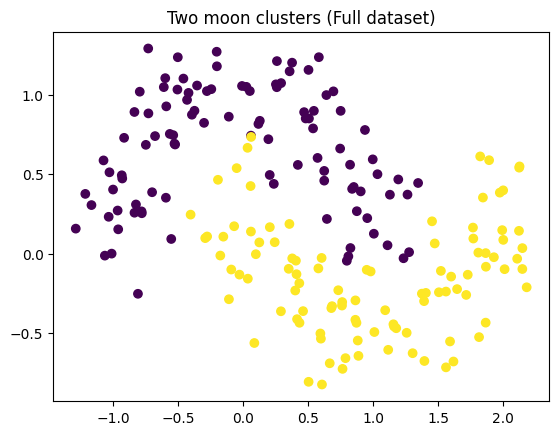

In [3]:
X, y = sklearn.datasets.make_moons(n_samples=200, noise=0.19, random_state=91859) #TODO: Change random_state to the last 5 digits of your BuffOne card42
X_train, y_train = X[:100], y[:100]
X_test, y_test = X[100:], y[100:]
plt.title("Two moon clusters (Full dataset)")
plt.scatter(X[:,0], X[:,1], c=y)
plt.show()

We have data!

Now, let's set up a KNNClassifier class. 

The KNNClassifier class will have ~~similar design to~~ the K-Nearest Neighbors classifier class from *scikit-learn*:
- Initialize the classifier with corresponding parameters (number of neighbors k)
- Fit the classifier using the training data
- Predict the class of new points `X_test`

We've written out a lot of the structure for you so it will be consistent and we can use / reuse it, and you can focus on the "important" stuff that actually relates to the machine learning itself.

~~*But professor, this code isn't complete!*~~

~~### Problem 1: Complete our KNN Classifier - 40 Points~~

~~1.1 - Complete the `get_counts` function to return the count of each class found in the training set (5 points)~~

~~1.2 - Complete the `majority_vote` function to determine the majority class of a series of neighbors (10 points)~~

~~1.3 - Complete the `predict` function to capture the predicted class of a new datapoint (10 points)~~

 ~~- HINT: Use the BallTree documentation to determine how to retrieve neighbors from the model (https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.BallTree.html#sklearn.neighbors.BallTree)~~

~~1.4 - Complete the `confusion_matrix` function to reveal the results of classification (5 points)~~

~~1.5 - Complete the `accuracy` function to get accuracy of the classifier based on a given test data (5 points)~~

Below, we'll be using our KNNClassifier (sent in as "model") and the show_decision_surface function from the homework's helper file to show how we would predict any points in space given the input data.

In [4]:
def show_decision_surface(model):
    """
    Helper function to visualize the decision surface of model
    :param model: Initialized KNNClassifier
    :return: None
    """
    x_min, x_max = X[:, 0].min()-1, X[:, 0].max()+1
    y_min, y_max = X[:, 1].min()-1, X[:, 1].max()+1
    x_grid = np.arange(x_min, x_max, 0.1)
    y_grid = np.arange(y_min, y_max, 0.1)
    xx, yy = np.meshgrid(x_grid, y_grid)
    r1, r2 = xx.reshape(-1,1), yy.reshape(-1,1)
    grid = np.hstack((r1,r2))
    y_hat = model.predict(grid)
    zz = y_hat.reshape(xx.shape)
    plt.contourf(xx, yy, zz, cmap='PiYG')
    plt.scatter(X[:,0], X[:,1], c=y)
    plt.show()

__STEP 2.__ Try different values of k and report their accuracies and confusion matrices on the test set. Make sure to keep `random_state` set as your unique seed above so that the reported values don't change when code is re-run.

_Unlike in the Problem Set, we are implementing SKLearn's Confusion Matrix and Confusion Matrix Display components._

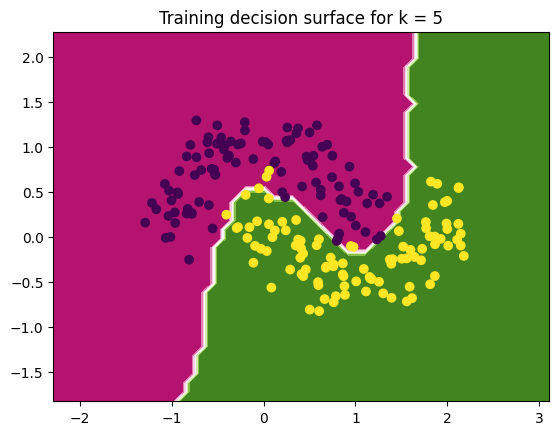

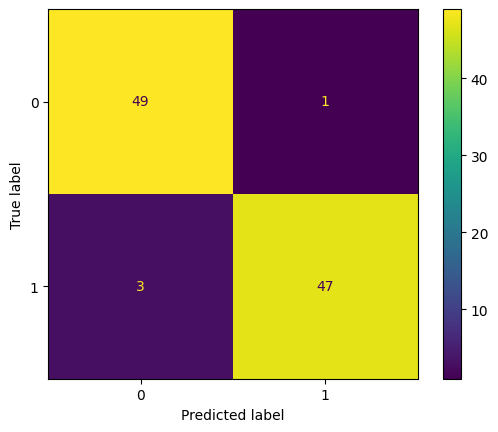

In [5]:
#TODO: Try different Ks        
kk = 5
model = sklearn.neighbors.KNeighborsClassifier(n_neighbors=kk)
model = model.fit(X_train, y_train)
plt.title("Training decision surface for k = {}".format(kk))
show_decision_surface(model)
y_pred = model.predict(X_test)
conf = sklearn.metrics.confusion_matrix(y_test, y_pred)
disp = sklearn.metrics.ConfusionMatrixDisplay(conf)
disp.plot()
plt.show()

#END

#### STEP 3 WRITEUP

1) Which K has the highest accuracy? What is that accuracy?

2) What is the distribution of false positives and false negatives for your best K?

#TODO: STEP 3 Response here

1. In the code markdown below, I  created models for different k's, did predict on them, calculated their error, and found the one with the most accuracy and that was $k = 5$. However, there were four other k's greater than 5 that also had an accuracy of 0.97 (which is what $k = 5$ got) but I chose 5 because it was the first one among the four. The k's I worked with ranged from $k=1$ to $k=20$.

2. Among the 100 data points of the training data, 2 was false positives, giving us the distribution or error of $1/50$ (2/100) for the false positives. (Error = #how many missed/total). For the false negatives, it was only 1, so the error becomes $1/100$. Total error is therefore just $3/100$.

In [8]:
model_lst = list(range(21))
y_predict_lst = list(range(21))
error_lst = list(range(21))

best_k = -1
prob = -1


for i in range(3, 21):
    model_lst[i] = sklearn.neighbors.KNeighborsClassifier(n_neighbors=i)
    model_lst[i] = model_lst[i].fit(X_train, y_train)
    #creating the model here

    y_predict_lst[i] = model_lst[i].predict(X_test)
    # no we are predicting

    error_lst[i] = sklearn.metrics.confusion_matrix(y_test, y_predict_lst[i])
    error_lst[i] = (error_lst[i][0][0] + error_lst[i][1][1])/100
    # we are creating the error here

for i in range(3, 21):
    if error_lst[i] > prob:
        prob = error_lst[i]
        best_k = i

print(f"The best k = {best_k} has this best accuracy {error_lst[best_k]}")
  
    
    

The best k = 3 has this best accuracy 0.97
